In [3]:
#Just import anything I might need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from os import path
import shutil
import csv


from sklearn.cluster import KMeans
from sklearn.svm import SVC

Centroids are: [[1.21360507e+08 6.57028986e+00]
 [2.60907884e+07 6.29404440e+00]
 [6.32520294e+07 6.28976471e+00]
 [2.82381650e+06 6.40631607e+00]
 [1.94727273e+08 6.92454545e+00]]
The final distortion is: 5.3705763513246944e+17


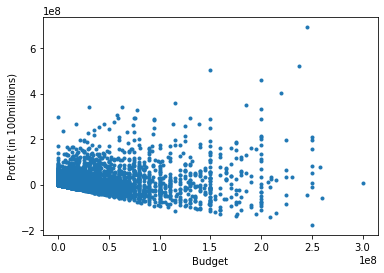

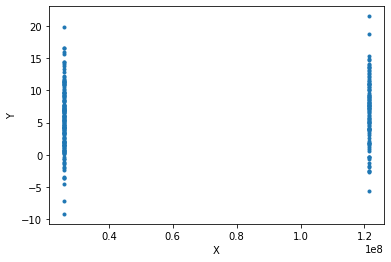

Right cluster


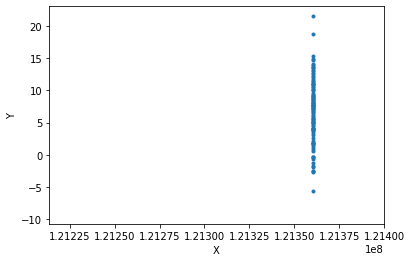

Left cluster


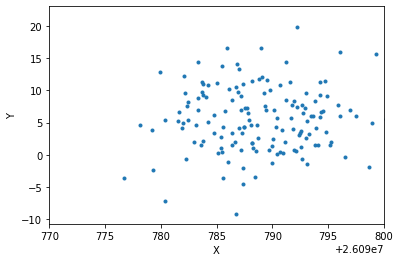

,X,Y
240,2.609079e+07,0.284263
241,2.609079e+07,10.038691
242,2.609078e+07,5.259650
243,2.609079e+07,0.772130
244,2.609079e+07,4.369922
245,2.609078e+07,7.019096
246,2.609079e+07,10.277686
247,2.609079e+07,2.045816
248,2.609079e+07,10.906011
249,2.609080e+07,-0.410824


In [38]:
#Make DF
moviesDF = pd.read_csv("moviesCopyTrimmed.csv")

#Set features
X = moviesDF[["budget", 'score']]
y = moviesDF['Profit']

#Not doing SVMs
#svm_classifier = SVC(kernel = 'rbf')
#svm_classifier = SVC(kernel = 'linear')
#svm_classifier = SVC(kernel = 'sigmoid', max_iter=5000)
#svm_classifier.fit(X,y)

#Play around with numbers to see what clusters I get, haven't had much success with all the clusters
kmeans_classifier = KMeans(n_clusters=5, n_init=20)
kmeans_classifier.fit(X,y)
#print("Intercepts are:", svm_classifier.intercept_)
#print("Hyperplane coefficients are:", svm_classifier.coef_)

print("Centroids are:", kmeans_classifier.cluster_centers_)
print("The final distortion is:", kmeans_classifier.inertia_)


#Calculate things to make the cluster data. I played with random numbers with noise and point sand they just shift the data from one cluster to another
centroids = kmeans_classifier.cluster_centers_
noise = [(5.0 ,5.0), (5.0,5.0)]
points = [100, 150]

#Make points
dataframe = build_cluster_data(centroids, noise, points, random_state=45)
dataframe.head(10)


#Plot budget vs profit
plt.scatter(moviesDF["budget"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Budget")
plt.show()


#Plot "clusters"
plt.scatter(dataframe['X'], dataframe['Y'], marker = ".")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#Plot right cluster
print("Right cluster")
plt.scatter(dataframe['X'], dataframe['Y'], marker = ".")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(121213500,121400000)
plt.show()


#Plot left cluster
print("Left cluster")
plt.scatter(dataframe['X'], dataframe['Y'], marker = ".")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(26090770,26090800)
plt.show()


dataframe.tail(10)

#Not sure how this is supposed to work, adding "feature1" and "feature2" don't work so I'm not sure what is supposed to go there
#new_instance = [[moviesDF["budget"][234], moviesDF["score"][234], ...]]
#class_out = kmeans_classifier.predict(new_instance)
#print("The predicted class:", class_out)

In [10]:
def build_cluster_data(centroids, noise_sd, points_per_cluster,  random_state=20):
    feature_names = ["X", "Y"]

    # Generate the same sequence each time
    np.random.seed(random_state)

    data_x = []
    data_y = []
    
    grouping = zip(centroids, noise_sd, points_per_cluster)
    for ((x,y), (x_sd, y_sd), points) in grouping:
        x_noise_values = np.random.normal(0, x_sd, points)
        y_noise_values = np.random.normal(0, y_sd, points)
        
        x_values = x+x_noise_values
        y_values = y+y_noise_values
        
        data_x = np.concatenate((data_x, x_values))
        data_y = np.concatenate((data_y, y_values))


    # create a dictionary with each feature
    d = {}
    d["X"] = data_x
    d["Y"] = data_y

    #print(d)

    # Create the data frame from the dictionary
    dataframe = pd.DataFrame(data=d)
    return dataframe

In [11]:
#DIdn't end up using

def build_rings(number_of_targets=2, rings=3, inner_radius=2, ring_size=3, margin=0.5, points_per_ring=50, noise_sd=0.5, random_state=20):
    feature_names = ["X", "Y"]

    # Generate the same sequence each time
    np.random.seed(random_state)

    data_x = []
    data_y = []
    data_target = []
    min_radius = inner_radius
    max_radius = inner_radius + ring_size
    center = (min_radius + max_radius)/2
    target = 0
    for index in range(rings):
        theta_values = np.random.uniform(0, 360, points_per_ring)
        r_values = np.random.uniform(min_radius+margin, max_radius-margin, points_per_ring)
        # draw the noise from a distribution centered on 0.0 with a standard deviation of noise_sd
        noise_values = np.random.normal(0, noise_sd, points_per_ring)
        r_values = r_values + noise_values
        x_values = r_values * np.sin(theta_values)
        y_values = r_values * np.cos(theta_values)
        target_values = [target] * points_per_ring

        #print(theta_values)
        #print(r_values)
        #print(x_values)
        #print(y_values)
        #print(target_values)
        target = np.mod(target+1, number_of_targets)

        data_x = np.concatenate((data_x, x_values))
        data_y = np.concatenate((data_y, y_values))
        data_target = np.concatenate((data_target, target_values))

        min_radius += ring_size
        max_radius += ring_size


    #print(data_x)
    #print(data_y)
    #print(data_target)


    #target = [balance(left,right) for (left,right) in zip(feature1, feature2)]
    #print(feature1)
    #print(feature2)
    #print(target)

    # create a dictionary with each feature
    d = {}
    d["X"] = data_x
    d["Y"] = data_y
    d["Class"] = data_target

    #print(d)

    # Create the data frame from the dictionary
    dataframe = pd.DataFrame(data=d)
    return dataframe

#### Dimensional Analysis

Well no matter how I chagne the values for literally every number up there the data puts itself into two lines on either side of the graph. Depending on how big I make the noise, the line on the right is bigger/smaller. For identifying dimensions, we can cut out everything 1e.5- 1e6.5. 

Left Cluster:
plt.xlim(109900,110000)

Right Cluster:
plt.xlim(68221755,68221787)

The clustering doesn't seem to make sense, I tried to get everywhere between 2 and 2000 clusters and every time it only makes two at the two extremes. It just doesn't make sense. The dimensions seem to be hard stuck with how it is clustering them regardless of how I do it. The clusters are likely classifying as "yes profitable" and "not profitable", a binary classification almost since it is ignoring clusters. It is locking the data at either 11000 (roughly) and 68222000 (roughly) which is a really low profit and a reasonably high profit.


This data is chalk full of anomalies, as seen in the initial exploration Pirates of the Caribbean at Worlds End had the largest budget but only made 9.4m profit. Pirates of the Caribbean On Stranger Tides had the 5th largest budget but LOST 9m. There are also movies like Star Wars The Force Awakens that made a rediculous 691 MILLION dollars and movies like John Carter that lost 177m. The profits on movies range from -177m through 691m and the budgets range from 0 to 300m. Most of the data resides around 0 profit and 50m budget. It would make sense for a cluster to make a big cluster at 0 profit, 50m budget, and it kind of did with a cluster at the left side but it then took half the data with it. I feel like we should have MORE clusters but I can't get the program to try it. There should be 1 cluster at 0 budget and 0 profit because there are numerous movies that had that, they are indie movies with no huge budget or no huge sales, that could be a cluster on its own. Then take a cluster for lost profit and moderate budget, high profit high budget, high losses high budget, etc. The budget vs profit graph was a cone going up and to the right, originating at 0,0, there are surely more than 2 clusters you can make out of that. I am thinking that the clusters are giving in to the extremes. Star Wars The Force Awakens sits so much higher in terms of profit than any other datapoint, it alone could be pulling the cluster. Those high budget movies are rare but they seem to be getting clusters to themselves. The indie 0 budget movies are a large quantity and should have their own cluster but are getting pulled to the 11000 cluster. I really wanted at LEAST 5 clusters to work, ideally more, just to get a spread across the chart instead of excluding 90% of the graph. 


